# **Are animal adoption rates correlated with their PetFinder profile?** 

#### In this study, data from PetFinder.com will be analyzed to determine how an animal’s PetFinder profile affects the rates at which animals get adopted. The dataset was obtained from Kaggle (https://www.kaggle.com/c/petfinder-adoption-prediction/data). 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns

In [3]:
# Read in Dataset
df_all = pd.read_csv(r'C:\Users\julia\Dropbox\Data Science 2\Petfinder\train.csv')
print(f"The dataset contains the information of {len(df_all)} and {len(df_all.columns)} variables.")

The dataset contains the information of 14993 and 24 variables.


#### The following data fields are available for each animal:

In [4]:
df_all.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

# Description of columns:

PetID - Unique hash ID of pet profile<br>

AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.<br>

Type - Type of animal (1 = Dog, 2 = Cat)<br>

Name - Name of pet (Empty if not named)<br>

Age - Age of pet when listed, in months<br>

Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)<br>

Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)<br>

Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)<br>

Color1 - Color 1 of pet (Refer to ColorLabels dictionary)<br>

Color2 - Color 2 of pet (Refer to ColorLabels dictionary)<br>

Color3 - Color 3 of pet (Refer to ColorLabels dictionary)<br>

MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)<br>

FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)<br>

Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)<br>

Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)<br>

Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)<br>

Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)<br>

Quantity - Number of pets represented in profile<br>

Fee - Adoption fee (0 = Free)<br>

State - State location in Malaysia (Refer to StateLabels dictionary)<br>

RescuerID - Unique hash ID of rescuer<br>

VideoAmt - Total uploaded videos for this pet<br>

PhotoAmt - Total uploaded photos for this pet<br>


In [5]:
# Remove string columns
df_all=df_all.drop(['Name','RescuerID', 'Description', 'PetID'], axis=1)

## Univariate methods

outcome variabe: adoption speed
categorical: type, breed, gender
continuous: age, fee

In [10]:
df_all.isnull().any().any()

False

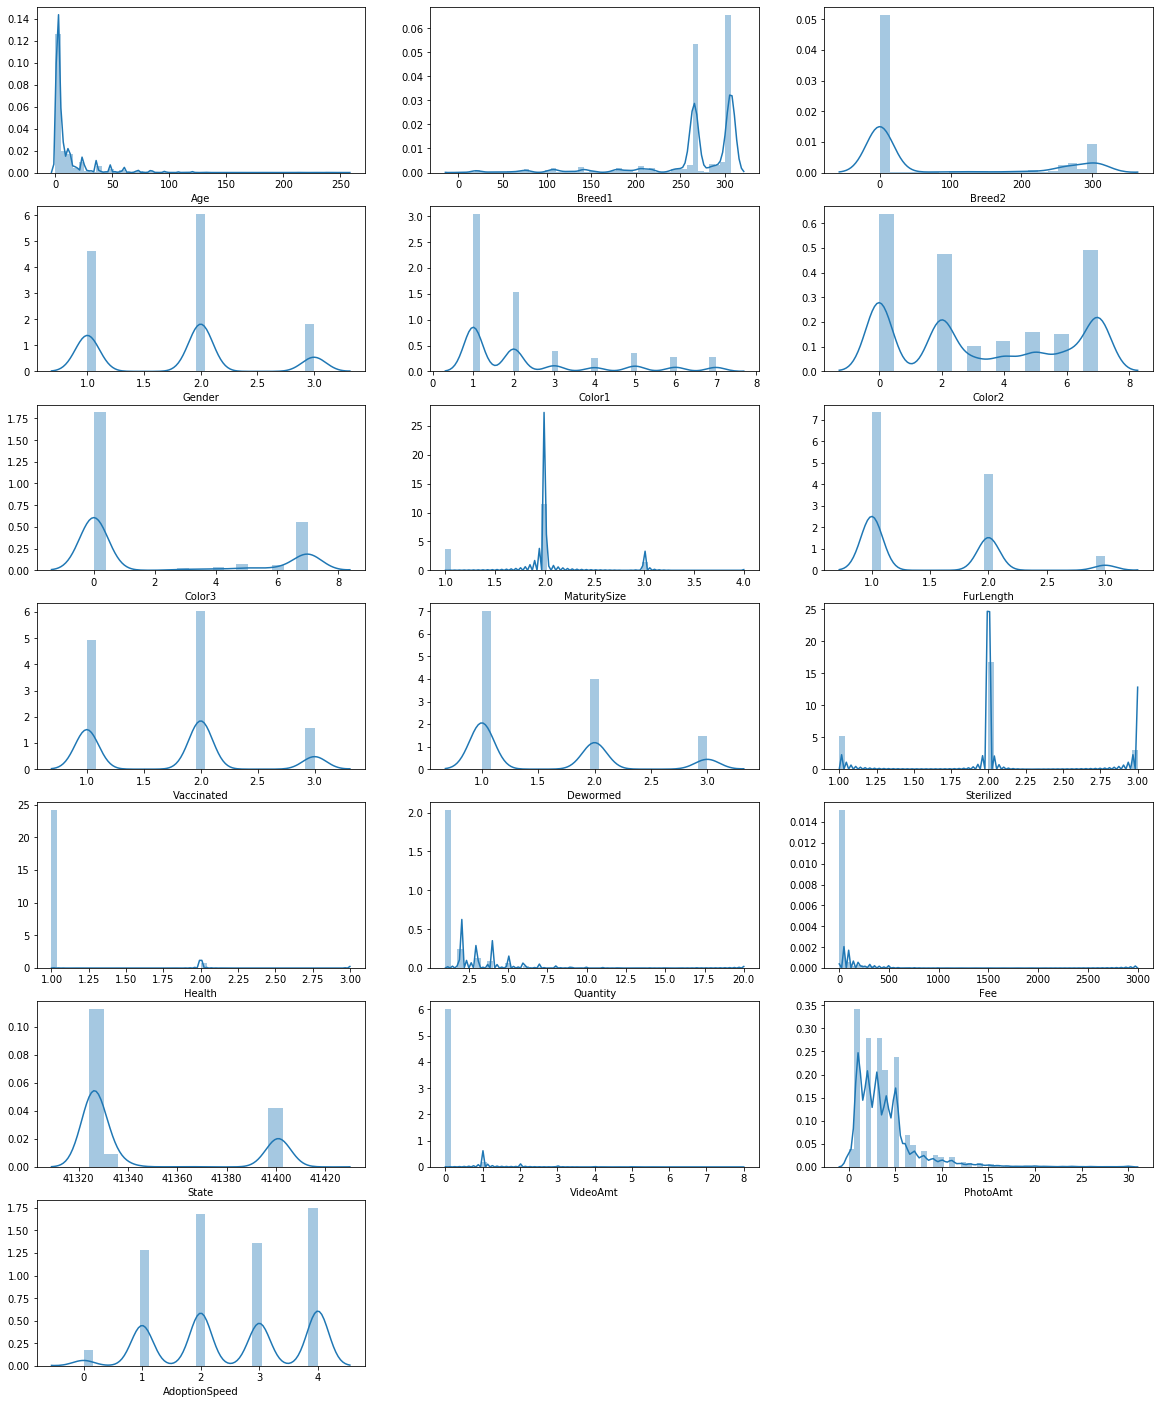

In [7]:
plt.figure(figsize=(20,25))

variables = df_all[['Age', 'Breed1','Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 
       'VideoAmt','PhotoAmt', 'AdoptionSpeed']]

i=1
for variable in variables:
    plt.subplot(7,3,i)
    current_df = df_all[variable]
    sns.distplot(df_all[variable])
    i+=1

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text yticklabel objects>)

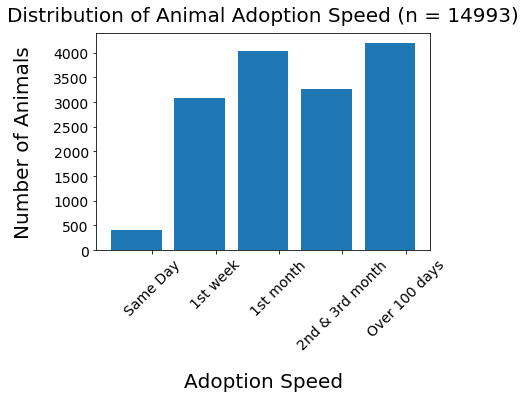

In [20]:
labels = ('Same Day', '1st week', '1st month', '2nd & 3rd month', 'Over 100 days')
index = np.arange(len(labels))
plt.bar(index, df_all['AdoptionSpeed'].value_counts(sort=False).sort_index())
plt.xlabel('Adoption Speed',fontsize=20, labelpad=20)
plt.ylabel('Number of Animals',fontsize=20, labelpad=20)
plt.title('Distribution of Animal Adoption Speed (n = ' + str(len(df_all)) + ')',fontsize=20,y=1.025)
plt.xticks(index + bar_width, labels,fontsize=14, rotation=45)
plt.yticks(fontsize=14)


## Bivariate Methods

Text(0.5, 1.0, 'Adoption Speed by Age')

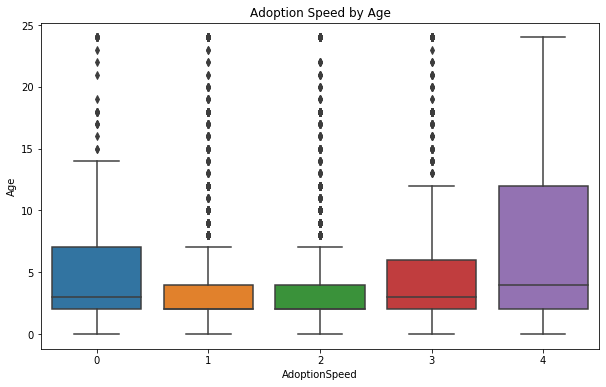

In [25]:
# Look at adoption speed by age
plt.figure(figsize=(10, 6))
sns.boxplot(x="AdoptionSpeed", y="Age",data=df_all[df_all['Age']<25])
plt.title('Adoption Speed by Age')

Text(0.5, 1.0, 'Adoption Speed by Age')

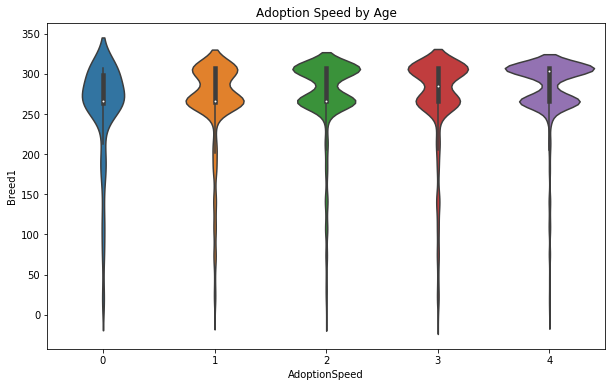

In [30]:

plt.figure(figsize=(10, 6))
sns.violinplot(x="AdoptionSpeed", y="Breed1",data=df_all[df_all['Age']<25])
plt.title('Adoption Speed by Breed')

Text(0.5, 1.0, 'Adoption Speed by Fee Amount')

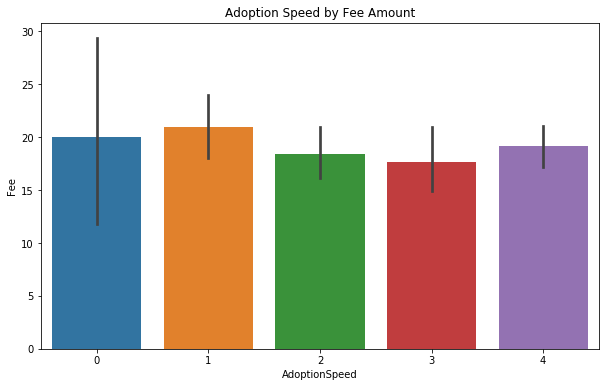

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x="AdoptionSpeed", y="Fee",data=df_all[df_all['Age']<25])
plt.title('Adoption Speed by Fee Amount')

Text(0.5, 1.025, 'Gender')

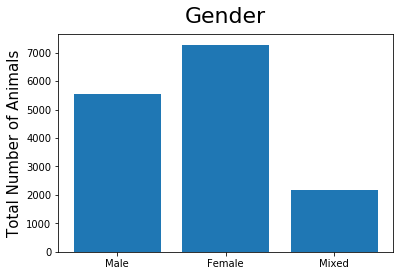

In [39]:
plt.bar(['Male','Female','Mixed'],df_all['Gender'].value_counts(sort=False).sort_index())
plt.ylabel('Total Number of Animals',fontsize=15)
plt.title('Gender',fontsize=22,y=1.025)

### Separate the dataframes for cats and dogs

There do not appear to be significant differences in adoption rate between cats and dogs.

### Make new features

Create purebred feature

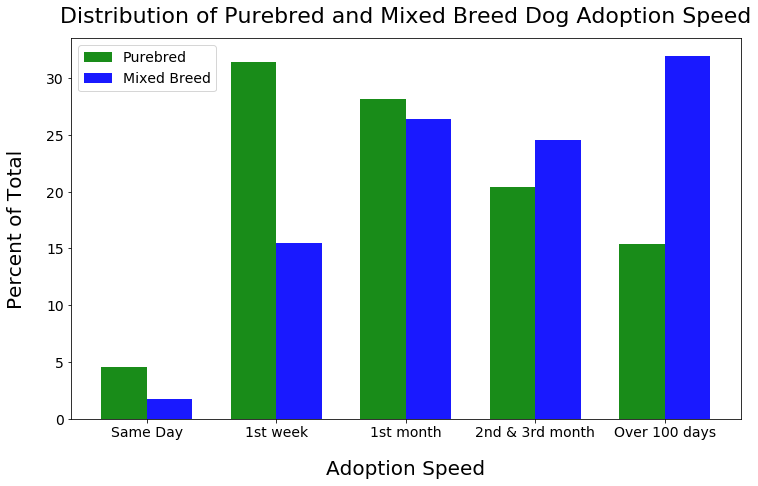

In [12]:
# A dog is purebred if primary breed does not equal 307 (breed codes were provided in attached spreadsheet) and if secondary
# breed is equal to 0
c1 = df_dog['Breed2']==0
c2 = df_dog['Breed1']!=307
c=c1&c2
Purebred=df_dog[c]

c1 = df_dog['Breed2']!=0
c2 = df_dog['Breed1']==307
c=c1|c2
Mixed = df_dog[c]

fig, ax = plt.subplots(figsize=(12, 7))
labels = ('Same Day', '1st week', '1st month', '2nd & 3rd month', 'Over 100 days')
index = np.arange(len(labels))
bar_width = 0.35
opacity = 0.9

Purebred_counts = Purebred['AdoptionSpeed'].value_counts(sort=False).sort_index()
Mixed_counts = Mixed['AdoptionSpeed'].value_counts(sort=False).sort_index()
Purebred_percent = Purebred_counts/sum(Purebred_counts)*100
Mixed_percent=Mixed_counts/sum(Mixed_counts)*100
#sns.barplot(index,Purebred_counts)
#sns.barplot(index,Mixed_counts)
rects1 = plt.bar(index , Purebred_percent, bar_width,
alpha=opacity,
color='g',
label='Purebred')

rects2 = plt.bar(index + bar_width, Mixed_percent, bar_width,
alpha=opacity,
color='b',
label='Mixed Breed')

plt.xlabel('Adoption Speed',fontsize=20, labelpad=20)
plt.ylabel('Percent of Total',fontsize=20, labelpad=20)
plt.title('Distribution of Purebred and Mixed Breed Dog Adoption Speed' ,fontsize=22,y=1.025)
plt.xticks(index + bar_width/2, labels,fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=2, prop={'size': 14})

In [87]:
features = pd.DataFrame()
features=pd.concat([features, pd.get_dummies(df_all['Gender'])], axis=1) 
features=pd.concat([features, pd.get_dummies(df_all['Breed1'])], axis=1) 
features= pd.concat([features, pd.get_dummies(df_all['Type'])], axis=1) 
features['Fee'] = np.where(df_all.Fee>=(0), 1, 0)
features['Age'] = np.where(df_all.Age>5, 0, 1)
features=pd.concat([features, pd.get_dummies(df_all['MaturitySize'])], axis=1) 
features=pd.concat([features, pd.get_dummies(df_all['Color1'])], axis=1)
features['VideoAmt'] = np.where(df_all.VideoAmt>0, 0, 1)
features['PhotoAmt'] = np.where(df_all.VideoAmt>0, 0, 1)

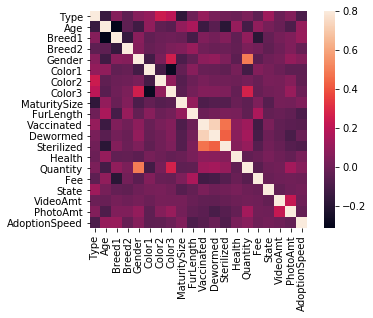

In [91]:
corrmat = df_all.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

### Five best features

In [93]:
correlations=abs(corrmat['AdoptionSpeed'][:-1])

In [98]:
correlations.sort_values()

VideoAmt        0.000571
Fee             0.004017
Color3          0.007014
State           0.013119
Dewormed        0.013210
Breed2          0.018642
PhotoAmt        0.023233
Health          0.029382
Color2          0.038579
Color1          0.044192
MaturitySize    0.045653
Gender          0.057622
Vaccinated      0.059043
Quantity        0.062931
Sterilized      0.083447
Type            0.091240
FurLength       0.091337
Age             0.100510
Breed1          0.107834
Name: AdoptionSpeed, dtype: float64

In [106]:
# PCA

from sklearn.decomposition import PCA 
X = df_all.drop(['AdoptionSpeed'],axis=1)
y = df_all['AdoptionSpeed']
pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.57987923 0.2438416  0.12398019]


In [114]:
# KBest
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
list(X.columns[selector.get_support(indices=True)])

['Age',
 'Breed1',
 'Breed2',
 'Color1',
 'Color2',
 'FurLength',
 'Quantity',
 'Fee',
 'VideoAmt',
 'PhotoAmt']